In [37]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [38]:
%%cython

import random
import operator
import math

xsize=10
ysize=10

def makeCities(n=50):
    cities=[]
    for i in range(0,n):
        cities.append((i,xsize*random.random(),ysize*random.random()))
    return cities
    
def connectCities(cities):
    return list(range(0,len(cities)))
    
def pathLength(cities, edges):
    length=0
    for c in range(0,len(edges)):
        i=edges[c]
        j=edges[(c+1)%len(edges)]
        x1=cities[i][1]
        x2=cities[j][1]
        y1=cities[i][2]
        y2=cities[j][2]
        length+=math.sqrt((x1-x2)**2+(y1-y2)**2)
    return length
    
def maxEdgeLength(cities, edges):
    m = 0
    for c in range(0,len(edges)):
        i=edges[c]
        j=edges[(c+1)%len(edges)]
        x1=cities[i][1]
        x2=cities[j][1]
        y1=cities[i][2]
        y2=cities[j][2]
        m = max(m, math.sqrt((x1-x2)**2+(y1-y2)**2))
    return m

def avgEdgeLength(cities, edges):
    length = pathLength(cities, edges)
    return length/len(cities)

def optimizeStep(f, cities, edges, temperature, length):
    newConns = list(edges)
    for n in range(0,2):
        i = random.randint(0,len(edges) - 1)
        j = random.randint(0,len(edges) - 1)
        newConns[i],newConns[j] = newConns[j],newConns[i]
    newLength = f(cities, newConns)
    delta = (newLength - length) / length
    if delta > temperature:
        return (length, edges)
    else:
        return (newLength, newConns)

def optimize(f, cities, edges, steps=100000, decay=10000):
    length = f(cities, edges)
    for i in range(0, steps):
        temperature = math.exp(-i/decay)
        length, edges = optimizeStep(f, cities, edges, temperature, length)
    return edges

def targetValue(cities, edges):
    return pathLength(cities, edges) + 2*maxEdgeLength(cities, edges)

cities = makeCities()
edges = connectCities(cities)

edges = optimize(targetValue, cities, edges, steps=1000000)
#edges = optimize(pathLength, cities, edges)
#edges = optimize(maxEdgeLength, cities, edges)

avgEdgeLength(cities, edges)

<IPython.core.display.Javascript object>


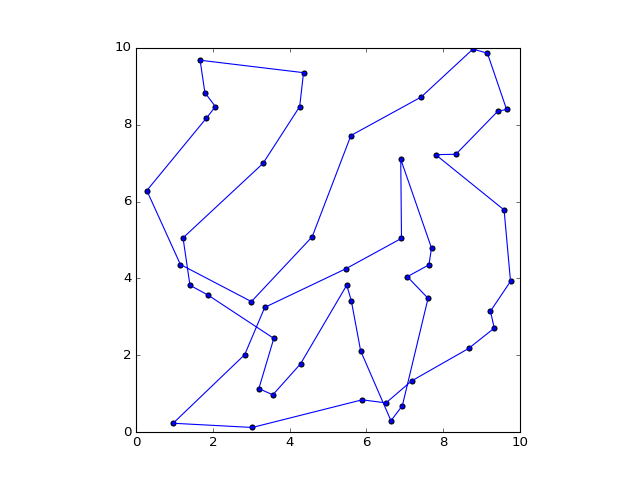

In [39]:
import matplotlib.pyplot as plt

%matplotlib notebook

def plotCities(cities):
    x=[city[1] for city in cities]
    y=[city[2] for city in cities]
    
    plt.scatter(x,y)
        
def plotEdges(cities, edges):
    x=[]
    y=[]
    for c in range(0,len(edges)):
        i=edges[c]
        j=edges[(c+1)%len(edges)]
        x.append(cities[i][1])
        x.append(cities[j][1])
        y.append(cities[i][2])
        y.append(cities[j][2])
    plt.plot(x,y)

plt.ylim((0,ysize))
plt.xlim((0,xsize))
plt.axes().set_aspect('equal')
plotCities(cities)
plotEdges(cities, edges)
plt.show()